In [1]:
%cd ../..

f:\DR\Stock-Market-Prediction\src


In [2]:
from lstm_model import build_model, train_model
from models.lstm_v2.lstm_normalize import get_lstm_data
from utils.chart import config_chart
import tensorflow as tf


---

## For **build_model** function

In [3]:
model = build_model()
model.summary()


{'name': 'lstm', 'trainable': True, 'dtype': 'float32', 'batch_input_shape': (None, 10, 4), 'return_sequences': True, 'return_state': False, 'go_backwards': False, 'stateful': False, 'unroll': False, 'time_major': False, 'units': 128, 'activation': 'tanh', 'recurrent_activation': 'sigmoid', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'recurrent_initializer': {'module': 'keras.initializers', 'class_name': 'Orthogonal', 'config': {'gain': 1.0, 'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'unit_forget_bias': True, 'kernel_regularizer': None, 'recurrent_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'recurrent_constraint': None, 'bias_constraint': None, 'dropout': 0.0, 'recurrent_dropout': 0.0, 'implementation': 2

---

## For **train_model** function

In [ ]:
train, test, predict = get_lstm_data()

x_train = train['x']
y_train = train['y']
x_dates_train = train['x_dates']
y_dates_train = train['y_dates']

x_test = test['x']
y_test = test['y']
x_dates_test = test['x_dates']
y_dates_test = test['y_dates']

x_predict = predict['x']
y_predict = predict['y']
x_dates_predict = predict['x_dates']
y_dates_predict = predict['y_dates']

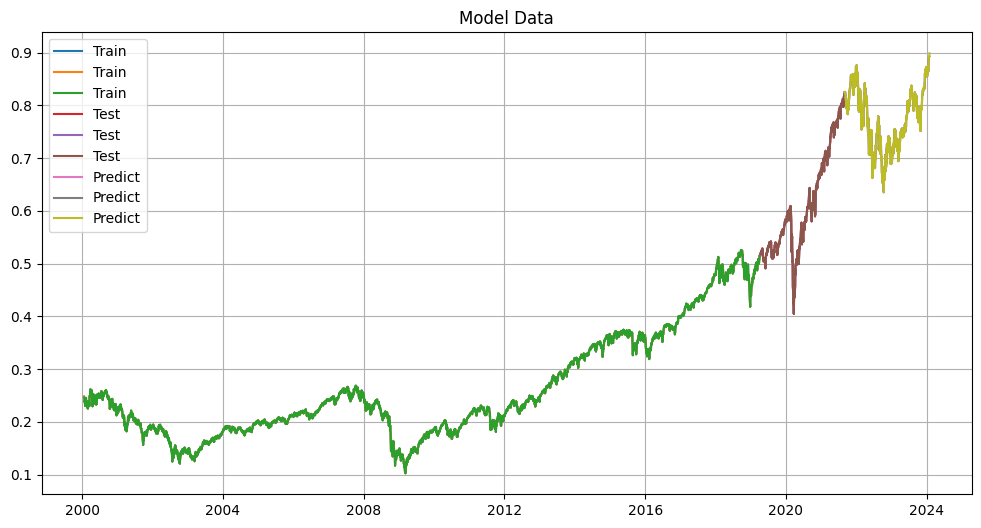

In [ ]:
plt = config_chart('Model Data')
plt.plot(y_dates_train, y_train[:, :, 0])
plt.plot(y_dates_test, y_test[:, :, 0])
plt.plot(y_dates_predict, y_predict[:, :, 0])
plt.legend(['Train', 'Train', 'Train',  'Test', 'Test', 'Test', 'Predict', 'Predict', 'Predict'])

In [ ]:
model, fit_result, evaluate_result = train_model(x_train, x_test, y_train, y_test)

Epoch 1/100


152/152 - 4s - loss: 0.0070 - mean_absolute_error: 0.0377 - 4s/epoch - 25ms/step
Epoch 2/100
152/152 - 1s - loss: 6.5836e-05 - mean_absolute_error: 0.0061 - 929ms/epoch - 6ms/step
Epoch 3/100
152/152 - 1s - loss: 6.2687e-05 - mean_absolute_error: 0.0060 - 889ms/epoch - 6ms/step
Epoch 4/100
152/152 - 1s - loss: 5.3436e-05 - mean_absolute_error: 0.0055 - 927ms/epoch - 6ms/step
Epoch 5/100
152/152 - 1s - loss: 5.5683e-05 - mean_absolute_error: 0.0056 - 900ms/epoch - 6ms/step
Epoch 6/100
152/152 - 1s - loss: 6.8477e-05 - mean_absolute_error: 0.0061 - 931ms/epoch - 6ms/step
Epoch 7/100
152/152 - 1s - loss: 4.8672e-05 - mean_absolute_error: 0.0052 - 949ms/epoch - 6ms/step
Epoch 8/100
152/152 - 1s - loss: 4.9504e-05 - mean_absolute_error: 0.0053 - 884ms/epoch - 6ms/step
Epoch 9/100
152/152 - 1s - loss: 6.0492e-05 - mean_absolute_error: 0.0059 - 884ms/epoch - 6ms/step
Epoch 10/100
152/152 - 1s - loss: 4.6569e-05 - mean_absolute_error: 0.0051 - 1s/epoch - 7ms/step
Epoch 11/100
152

AttributeError: module 'pydot' has no attribute 'InvocationException'

Text(0, 0.5, 'Value')

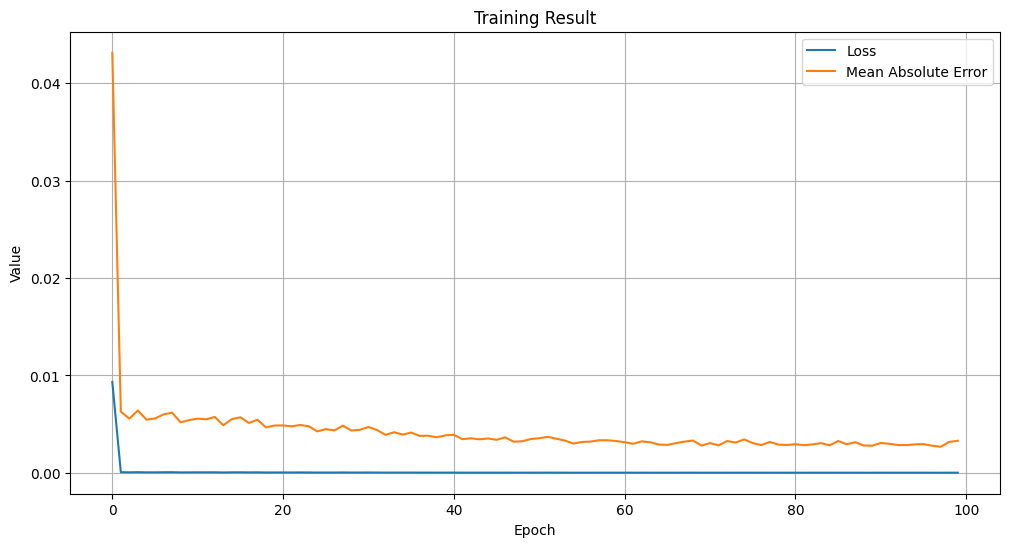

In [ ]:
plt = config_chart('Training Result')
plt.plot(fit_result.history['loss'])
plt.plot(fit_result.history['mean_absolute_error'])
plt.legend(['Loss', 'Mean Absolute Error'])
plt.xlabel('Epoch')
plt.ylabel('Value')

In [ ]:
model.save('./models/lstm_v2/lstm_model_v2')
model = tf.keras.models.load_model('./models/lstm_v2/lstm_model_v2')

INFO:tensorflow:Assets written to: ./models/lstm_v2/lstm_model_v2\assets


INFO:tensorflow:Assets written to: ./models/lstm_v2/lstm_model_v2\assets


In [ ]:
predictions = model.predict(x_test)

19/19 [==============================] - 1s 4ms/step


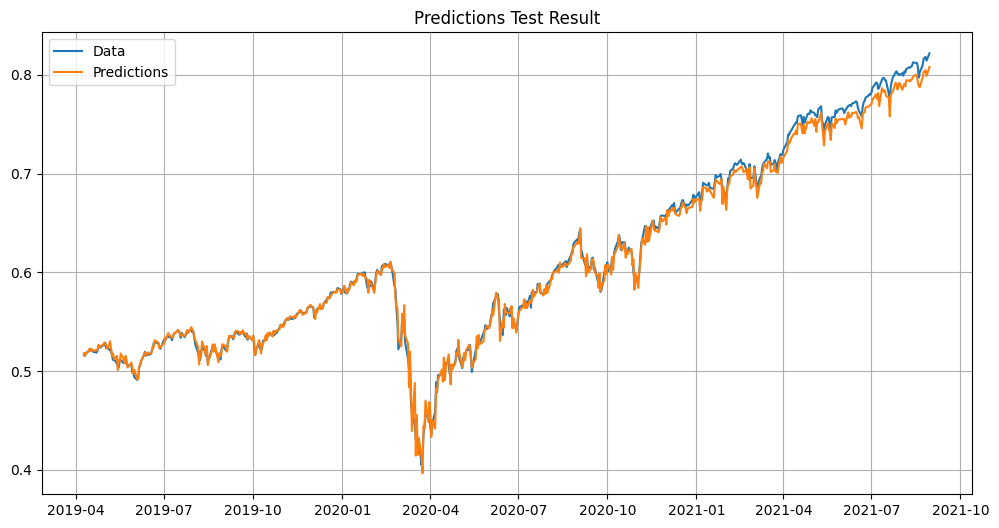

In [ ]:
plt = config_chart('Predictions Test Result')
plt.plot(y_dates_test[:, 0], y_test[:, 0, 0])
plt.plot(y_dates_test[:, 0], predictions[:, 0, 0])
plt.legend(['Data', 'Predictions'])

In [ ]:
predictions = model.predict(x_predict)

19/19 [==============================] - 0s 3ms/step


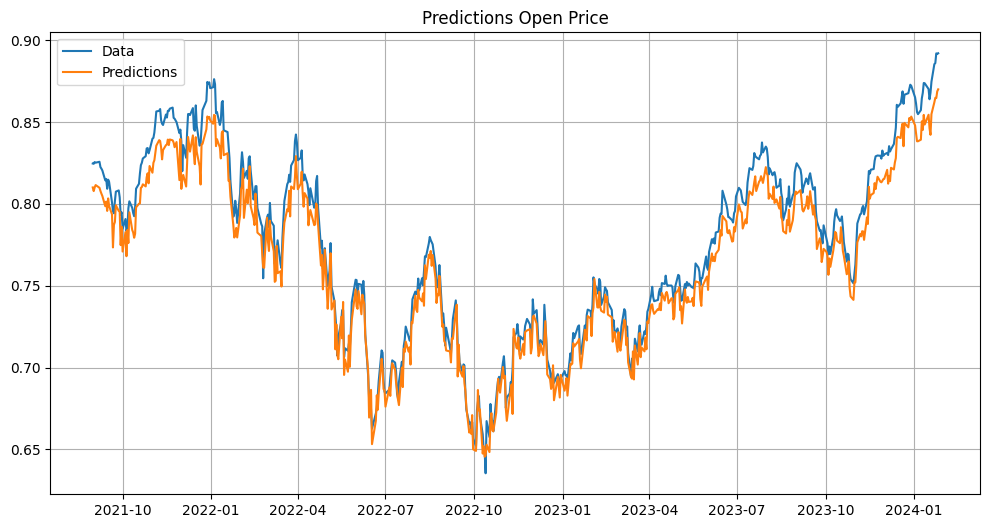

In [ ]:
plt = config_chart('Predictions Open Price')
plt.plot(y_dates_predict[:, 0], y_predict[:, 0, 0])
plt.plot(y_dates_predict[:, 0], predictions[:, 0, 0])
plt.legend(['Data', 'Predictions'])

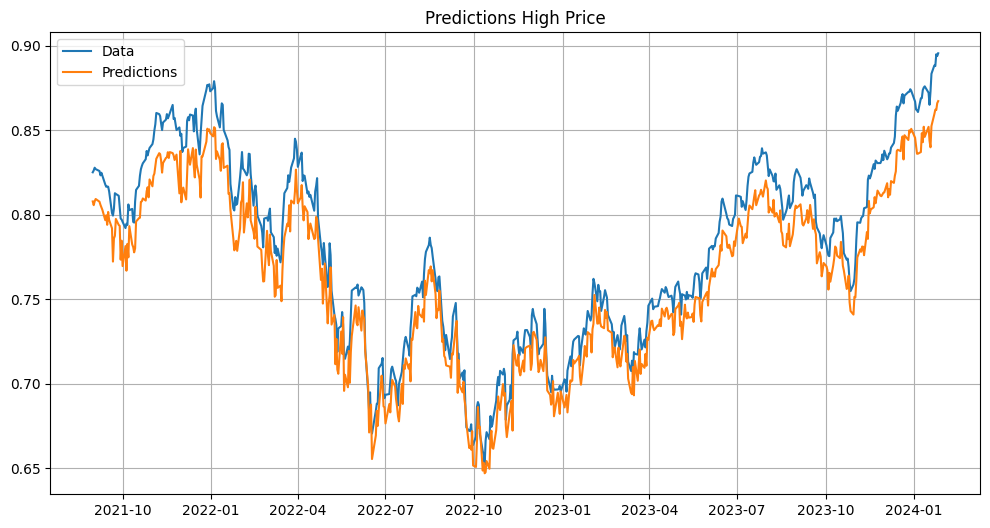

In [ ]:
plt = config_chart('Predictions High Price')
plt.plot(y_dates_predict[:, 0], y_predict[:, 0, 1])
plt.plot(y_dates_predict[:, 0], predictions[:, 0, 1])
plt.legend(['Data', 'Predictions'])

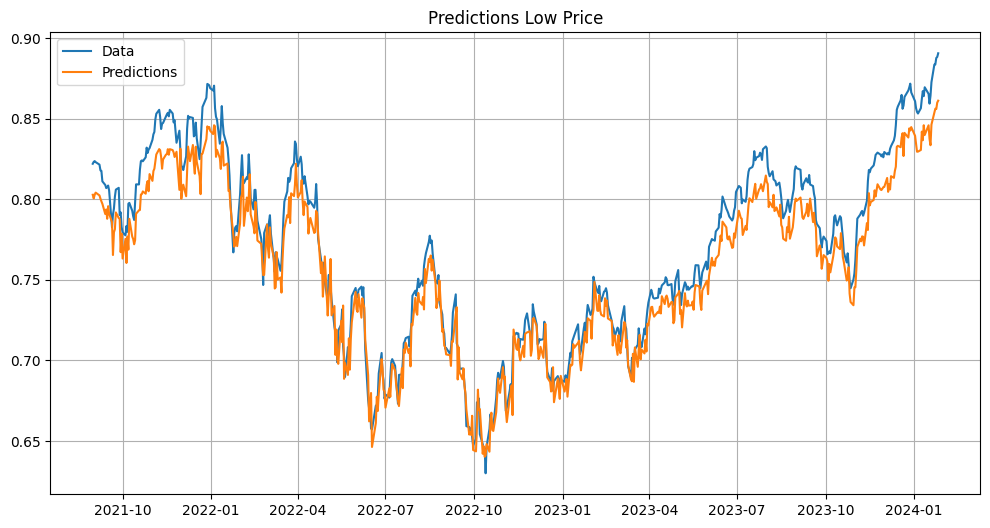

In [ ]:
plt = config_chart('Predictions Low Price')
plt.plot(y_dates_predict[:, 0], y_predict[:, 0, 2])
plt.plot(y_dates_predict[:, 0], predictions[:, 0, 2])
plt.legend(['Data', 'Predictions'])

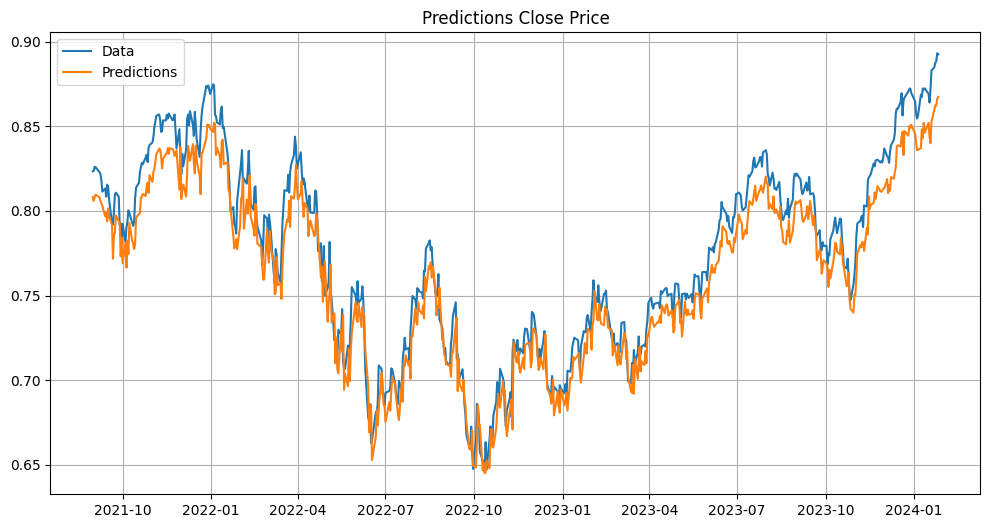

In [ ]:
plt = config_chart('Predictions Close Price')
plt.plot(y_dates_predict[:, 0], y_predict[:, 0, 3])
plt.plot(y_dates_predict[:, 0], predictions[:, 0, 3])
plt.legend(['Data', 'Predictions'])

In [ ]:

predictions = model.predict(x_predict)

19/19 [==============================] - 0s 3ms/step


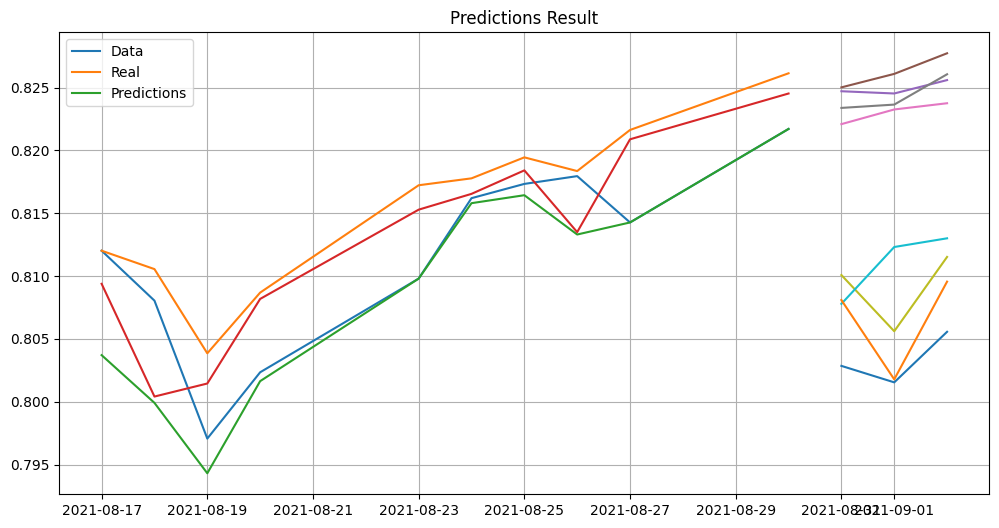

In [ ]:
index = 0

plt = config_chart('Predictions Result')
plt.plot(x_dates_predict[index], x_predict[index, : ])
plt.plot(y_dates_predict[index], y_predict[index, :])
plt.plot(y_dates_predict[index], predictions[index, :])
plt.legend(['Data', 'Real', 'Predictions'])